In [155]:
import pandas as pd
import numpy as np
import math
import yfinance as yf


from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [2]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

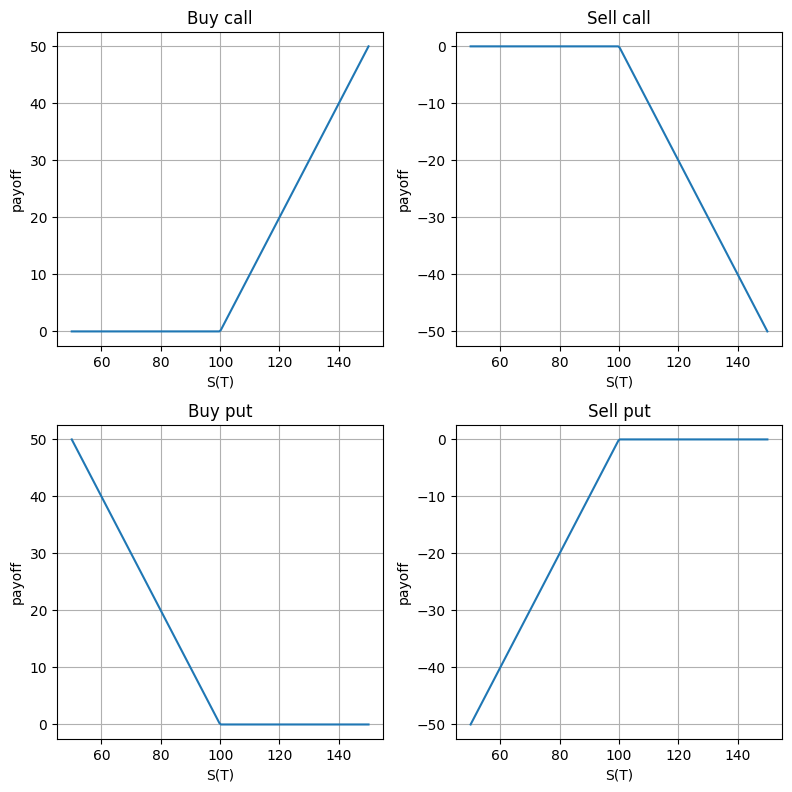

In [3]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [4]:
# Цена базового актива
S = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

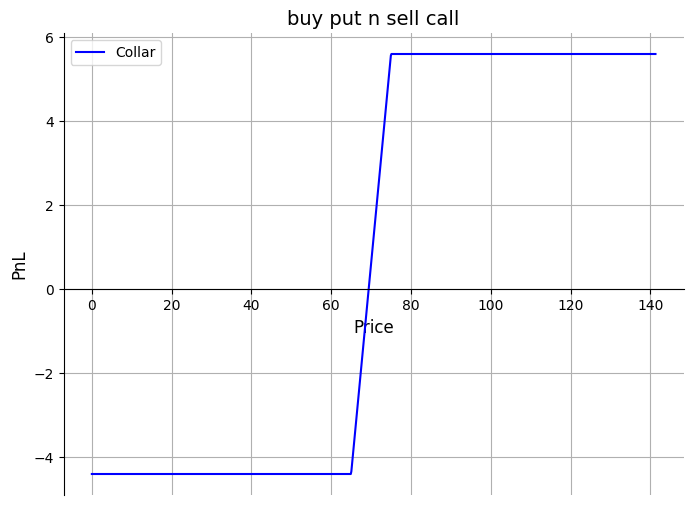

Максимальная прибыль: 66.25
Максимальный убыток: -65.05


In [15]:
pay = np.linspace(0, 2 * S, 1000)

payoff_short_call = payoff_sell_call(pay, K_short_call) + premium_short_call
payoff_long_put = payoff_buy_put(pay, K_long_put) - premium_long_put
payoff_collar = payoff_short_call + payoff_long_put

break_even_lower = K_long_put - premium_long_put
break_even_upper = K_short_call + premium_short_call

fig, ax = plt.subplots(figsize=(8, 6))


ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False)  
ax.spines['bottom'].set_position('zero')  

ax.plot(pay, payoff_collar + pay - S, label='Collar', color='blue') 

plt.xlabel('Price', fontsize=12)
plt.ylabel('PnL', fontsize=12)
plt.title('buy put n sell call', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

print("Максимальная прибыль:", max(payoff_collar))
print("Максимальный убыток:", round(min(payoff_collar), 2))

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [16]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

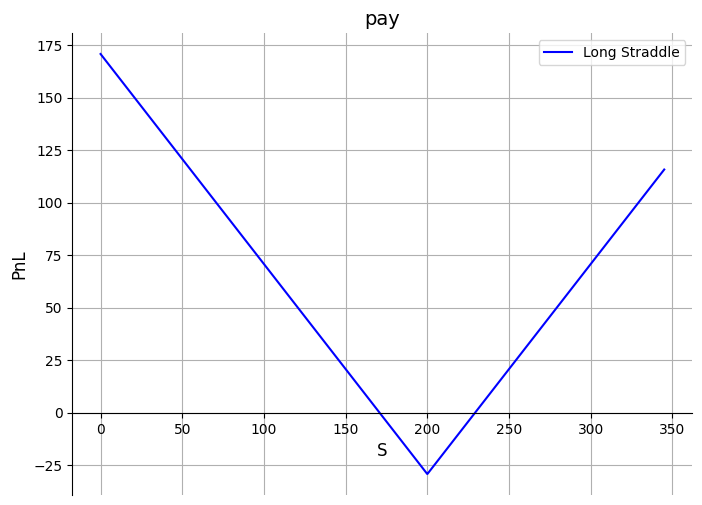

Unlimited
Максимальный убыток: -29.244954954954956


In [21]:
pay = np.linspace(0, 2 * S, 1000)

payoff_long_call = payoff_buy_call(pay, K_long_call) - premium_long_call
payoff_long_put = payoff_buy_put(pay, K_long_put) - premium_long_put

payoff_payraddle = payoff_long_call + payoff_long_put

fig, ax = plt.subplots(figsize=(8, 6))

ax.spines['top'].set_visible(False)   
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_position('zero')  


ax.plot(pay, payoff_payraddle, label='Long Straddle', color='b')

plt.xlabel('S', fontsize=12)
plt.ylabel('PnL', fontsize=12)
plt.title('pay', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


print("Unlimited")
print("Максимальный убыток:", min(payoff_payraddle))

# Биноминальная модель

In [22]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [27]:
# binomial_tree_pricer

# Визуализация биноминального дерева
def plot_binomial_tree(ax, statePrices, title):
    """
    Рисует биноминальное дерево на заданной оси (ax).
    """
    for i in range(0, n + 1):
        for j in range(0, n + 1):
            if j > i:
                break
            if i < n:
                x1, y1 = [i, i + 1], [2 * j - (i - 1), 2 * j + 1 - (i - 1)]
                ax.plot(x1, y1, marker='o', color="red")
                x1, y1 = [i, i + 1], [2 * j - (i - 1), 2 * j - 1 - (i - 1)]
                ax.plot(x1, y1, marker='o', color="black")
            ax.text(i - 0.2, 2 * j - (i - 1) - 0.6, "%.2f" % statePrices["payoff"][i][j], fontsize=8)
            ax.text(i - 0.2, 2 * j - (i - 1) - 1.0, "%.2f" % statePrices["underlying"][i][j], color="blue", fontsize=8)
    ax.set_title(title)
    ax.set_xlabel(f"p={statePrices['p']*100:.1f}%, u={statePrices['u']:.3f}, r={statePrices['r']*100:.2f}%, q={statePrices['q']*100:.2f}%, dt={statePrices['dt']*365:.2f}days")
    ax.grid()

# Биноминальная модель для опционов
def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, ax=None, title=None):
    dt = T / n
    up = np.exp(sigma * np.sqrt(dt))
    p0 = (up * np.exp((r - q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    statePrices = {"p": p0, "u": up, "r": r, "q": q, "dt": dt}
    statePrices["payoff"] = np.zeros((n + 1, n + 1))
    statePrices["underlying"] = np.zeros((n + 1, n + 1))

    p = np.zeros(n + 1)
    for i in range(n + 1):
        p[i] = payoff(S * up ** (2 * i - n))
        statePrices["payoff"][n][i] = p[i]
        statePrices["underlying"][n][i] = S * up ** (2 * i - n)

    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            p[i] = (p0 * p[i + 1] + p1 * p[i]) * df
            if american:
                early_exercise = payoff(S * up ** (2 * i - j))
                p[i] = max(early_exercise, p[i])
            statePrices["payoff"][j][i] = p[i]
            statePrices["underlying"][j][i] = S * up ** (2 * i - j)

    if ax is not None:
        plot_binomial_tree(ax, statePrices, title)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





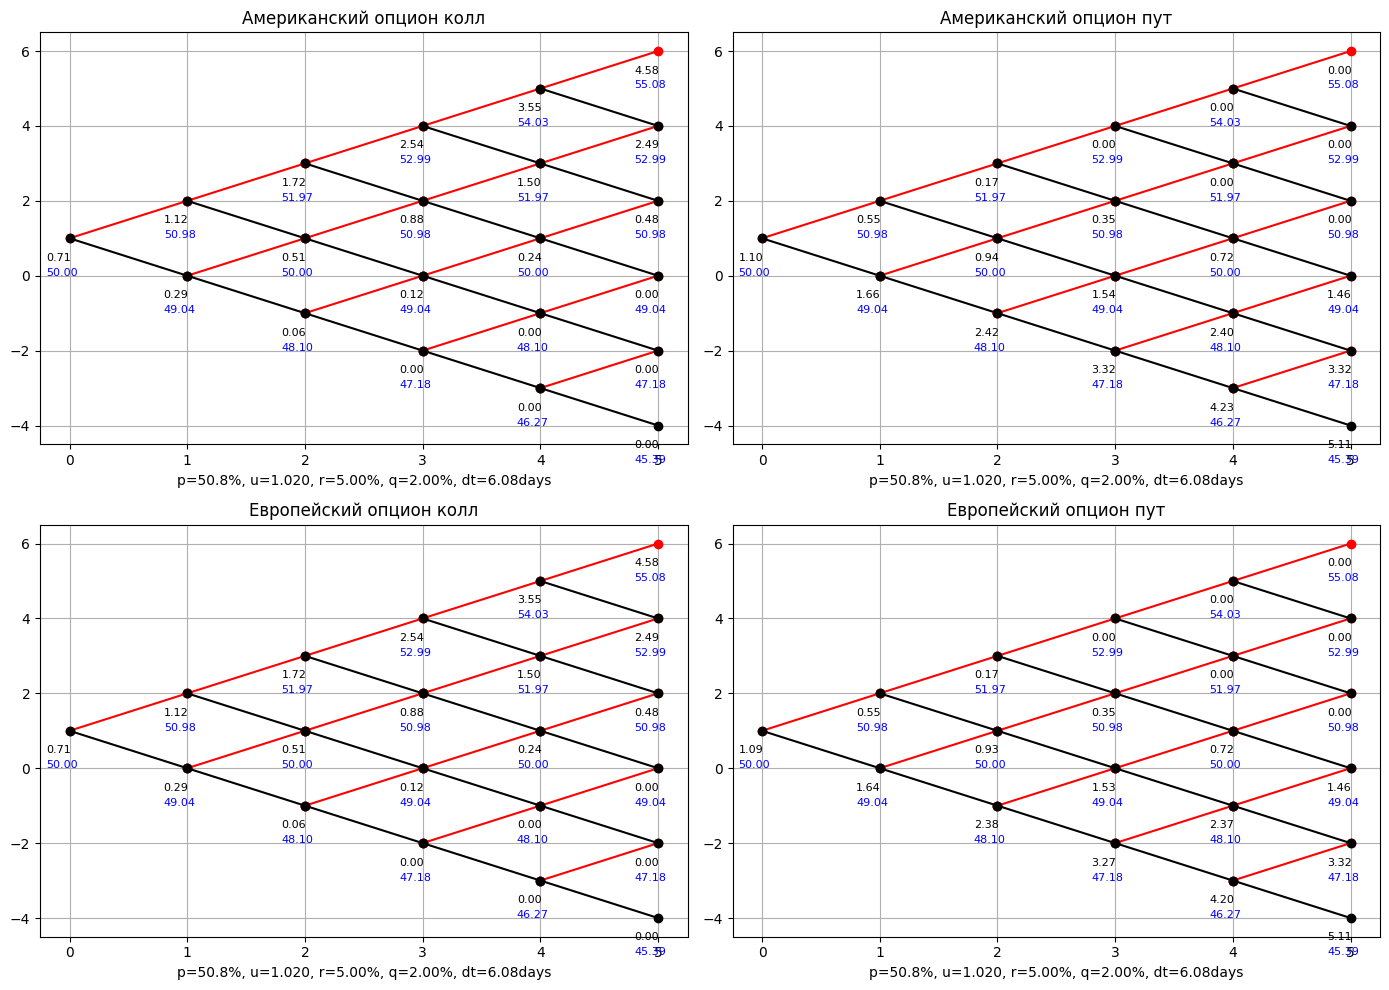

Цена американского опциона колл: 0.7120324211650718
Цена американского опциона пут: 1.0962783164249443
Цена европейского опциона колл: 0.7120324211650718
Цена европейского опциона пут: 1.0853174417962133


In [30]:
# Параметры
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1 / 12, 5, 50
K = S * 1.01

# Создание фигуры с 4 графиками 2х2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Американский колл
price_american_call = binomial_tree_pricer(
    r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=True, ax=axes[0, 0], title="Американский опцион колл"
)

# Американский пут
price_american_put = binomial_tree_pricer(
    r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=True, ax=axes[0, 1], title="Американский опцион пут"
)

# Европейский колл
price_european_call = binomial_tree_pricer(
    r, q, sigma, T, n, S, lambda S: max(S - K, 0), american=False, ax=axes[1, 0], title="Европейский опцион колл"
)

# Европейский пут
price_european_put = binomial_tree_pricer(
    r, q, sigma, T, n, S, lambda S: max(K - S, 0), american=False, ax=axes[1, 1], title="Европейский опцион пут"
)

# Настройка макета графиков
fig.tight_layout()
plt.show()

# Вывод цен
print("Цена американского опциона колл:", price_american_call)
print("Цена американского опциона пут:", price_american_put)
print("Цена европейского опциона колл:", price_european_call)
print("Цена европейского опциона пут:", price_european_put)

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [36]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [37]:
# Оценка опциона колл
def call(S, K, T, sigma, r, q):
    """
    Функция для расчета стоимости европейского колл опциона
    """
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Оценка опциона пут
def put(S, K, T, sigma, r, q):
    """
    Функция для расчета стоимости европейского пут опциона
    """
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

# Оценка опциона пут с использованием паритета цен
def put_paritet(S, K, T, sigma, r, q):
    """
    Расчет стоимости опциона пут через паритет колл и пут
    """
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [38]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

# Оценка стоимости опционов
call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)

put_price = put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

put_price_paritet = put_paritet(S0, K, T, sigma, r, q)
print('Оценка опциона пут через паритет =', put_price_paritet)

# Сравнение результатов
difference = abs(put_price - put_price_paritet)
print('Разница между оценками пут-опциона с/без паритета =', difference)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987
Оценка опциона пут через паритет = 8.44988262632198
Разница между оценками пут-опциона с/без паритета = 7.105427357601002e-15


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [135]:
def delta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return -norm.cdf(-d1)

def gamma(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)

def kappa(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return -np.exp(-r*T)*norm.cdf(d2) 
    elif option_type == 'put':
        return np.exp(-r * T) * norm.cdf(-d2)

def vega(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def rho(S, K, r, T, sigma, option_type):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

In [143]:
def plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call'):
  greeks = {
      'Delta': lambda S: delta(S, K, r, T, sigma, option_type),
      'Gamma': lambda S: gamma(S, K, r, T, sigma),
      'Theta': lambda S: theta(S, K, r, T, sigma, option_type),
      'Kappa': lambda S: kappa(S, K, r, T, sigma, option_type),
      'Vega': lambda S: vega(S, K, r, T, sigma),
      'Rho': lambda S: rho(S, K, r, T, sigma, option_type)
  }
  
  color = 'green' if option_type == 'call' else 'red'
  S_values = np.linspace(50, 150, N)
  
  
  fig, axs = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)
  
  for ax, (name, func) in zip(axs.flat, greeks.items()):
      
      values = [func(S) for S in S_values]
      
      
      ax.plot(S_values, values, label=name, color=color )
      ax.set_title(name, fontsize=14, fontweight='bold')
      ax.set_xlabel("Цена базового актива (S)", fontsize=12)
      ax.set_ylabel(f"{name} значение", fontsize=12)
      ax.legend(fontsize=10)
  
  
  fig.suptitle(f"Графики греческих параметров ({option_type.capitalize()} Option)", fontsize=16, fontweight='bold')
  plt.show()

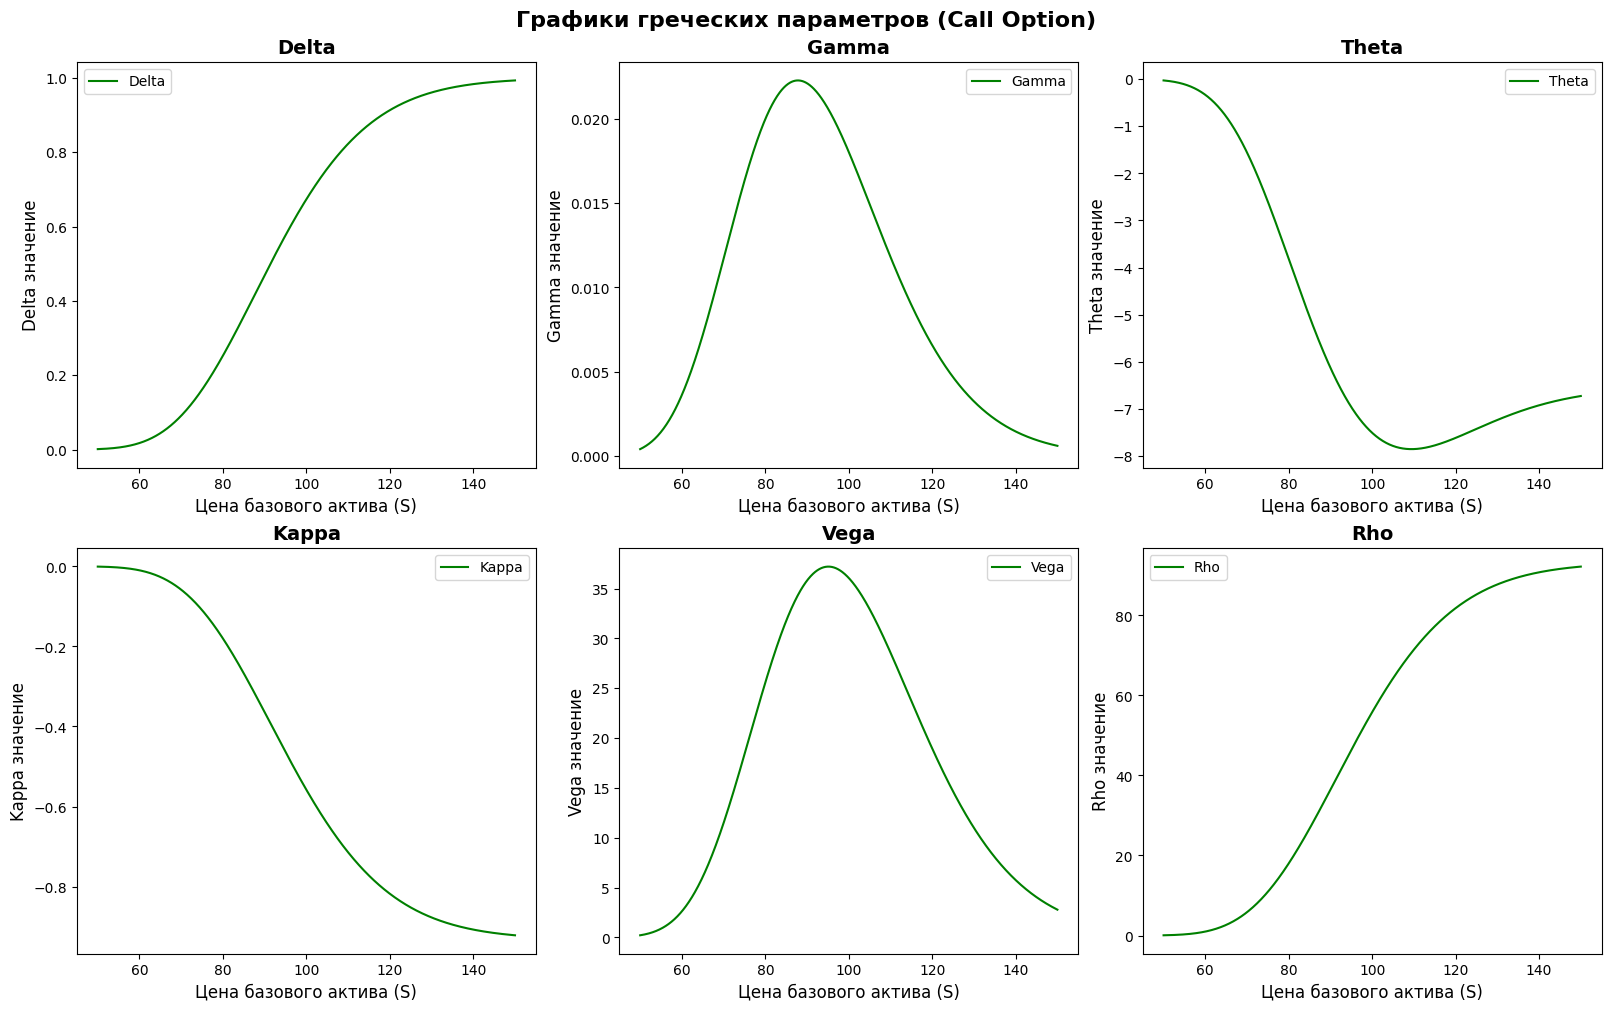

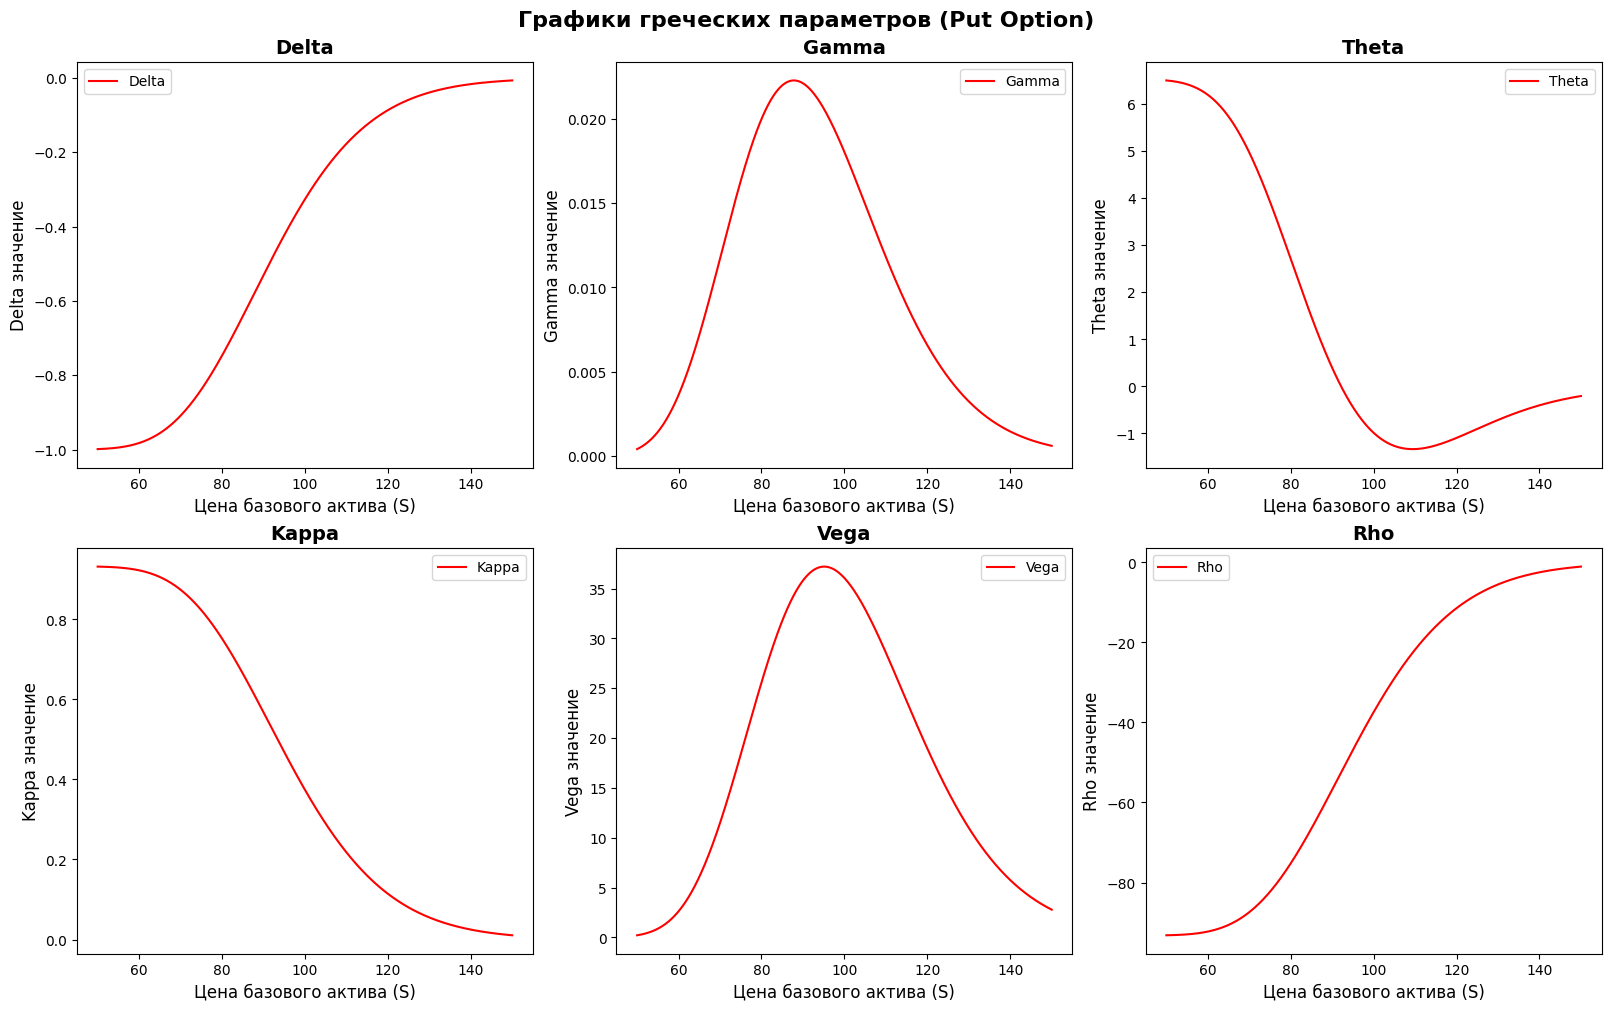

In [144]:
plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='call')
plot_greeks(K=100, r=0.07, T=1, sigma=0.2, N=1000, option_type='put')

Графики зависимости греческих характеристик для опционов от цены базового актива.

Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




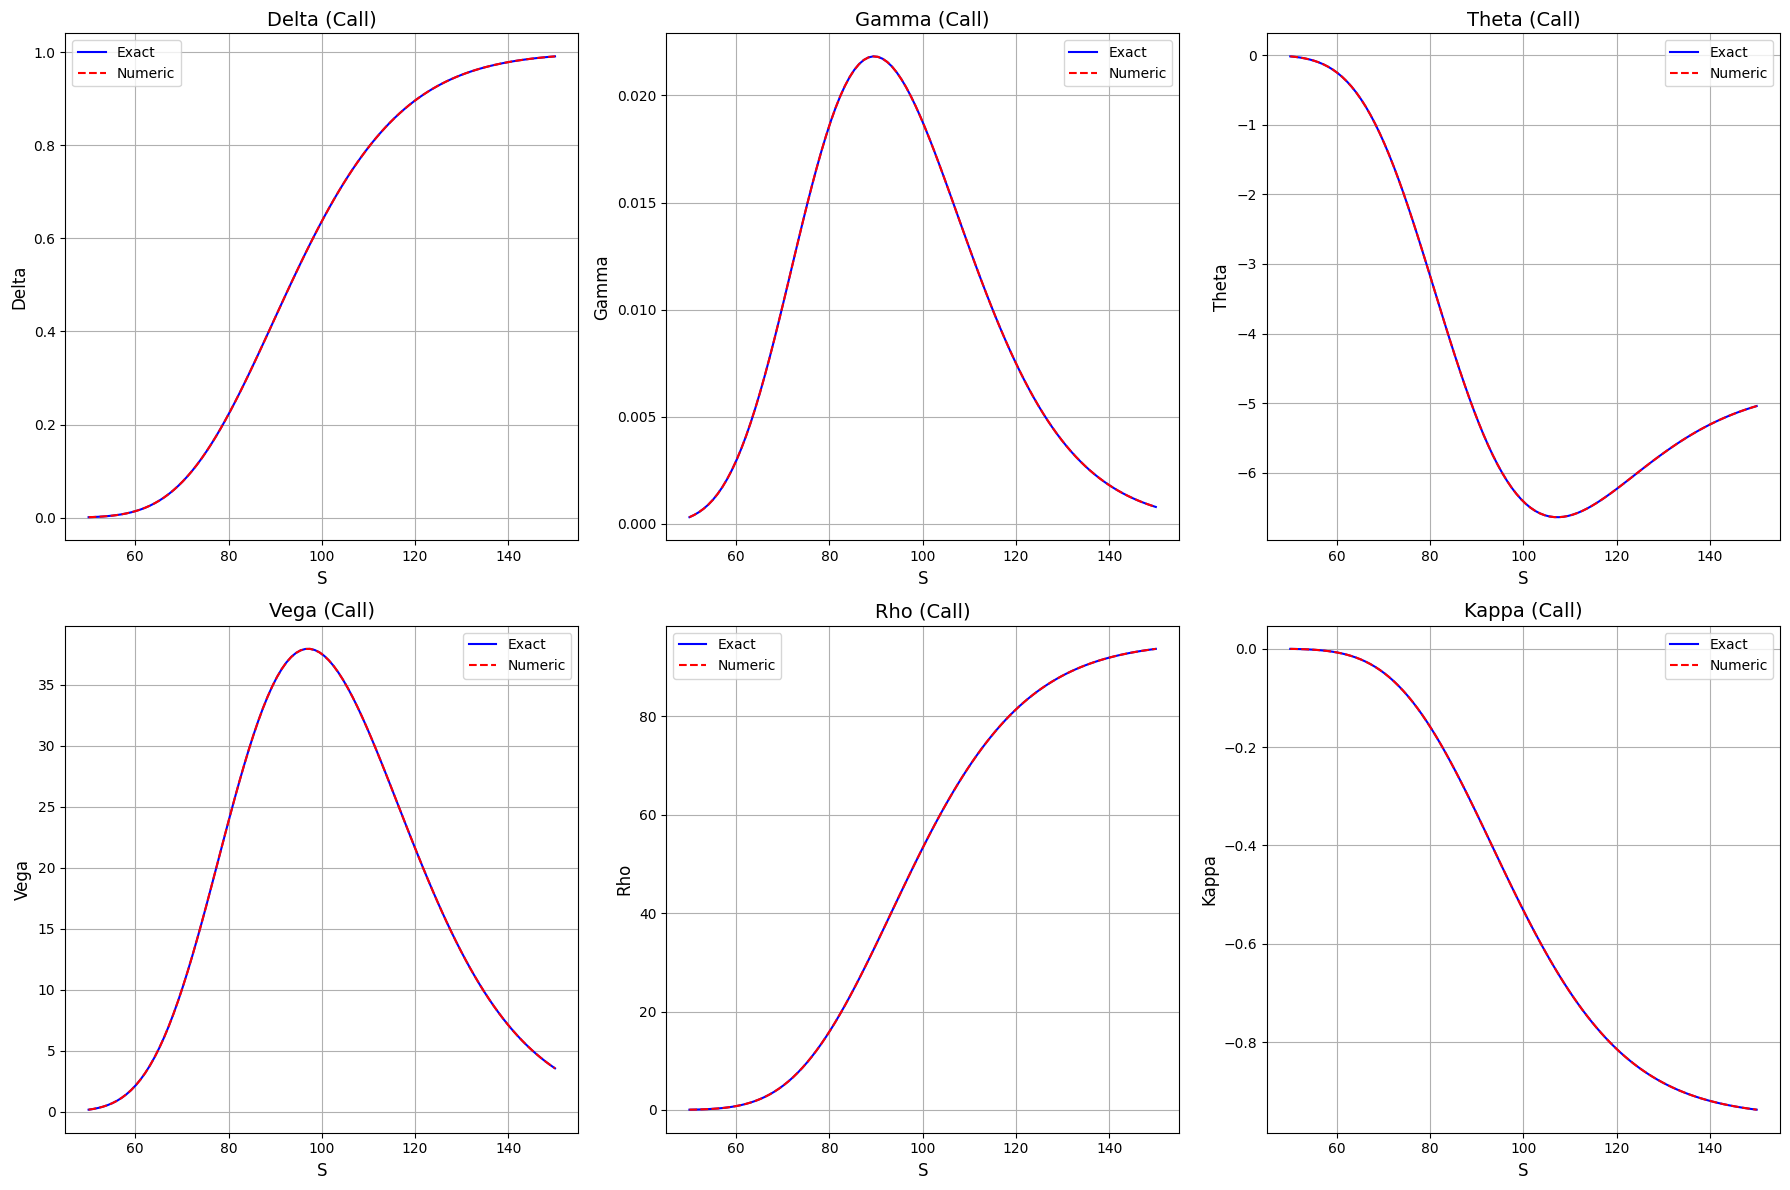

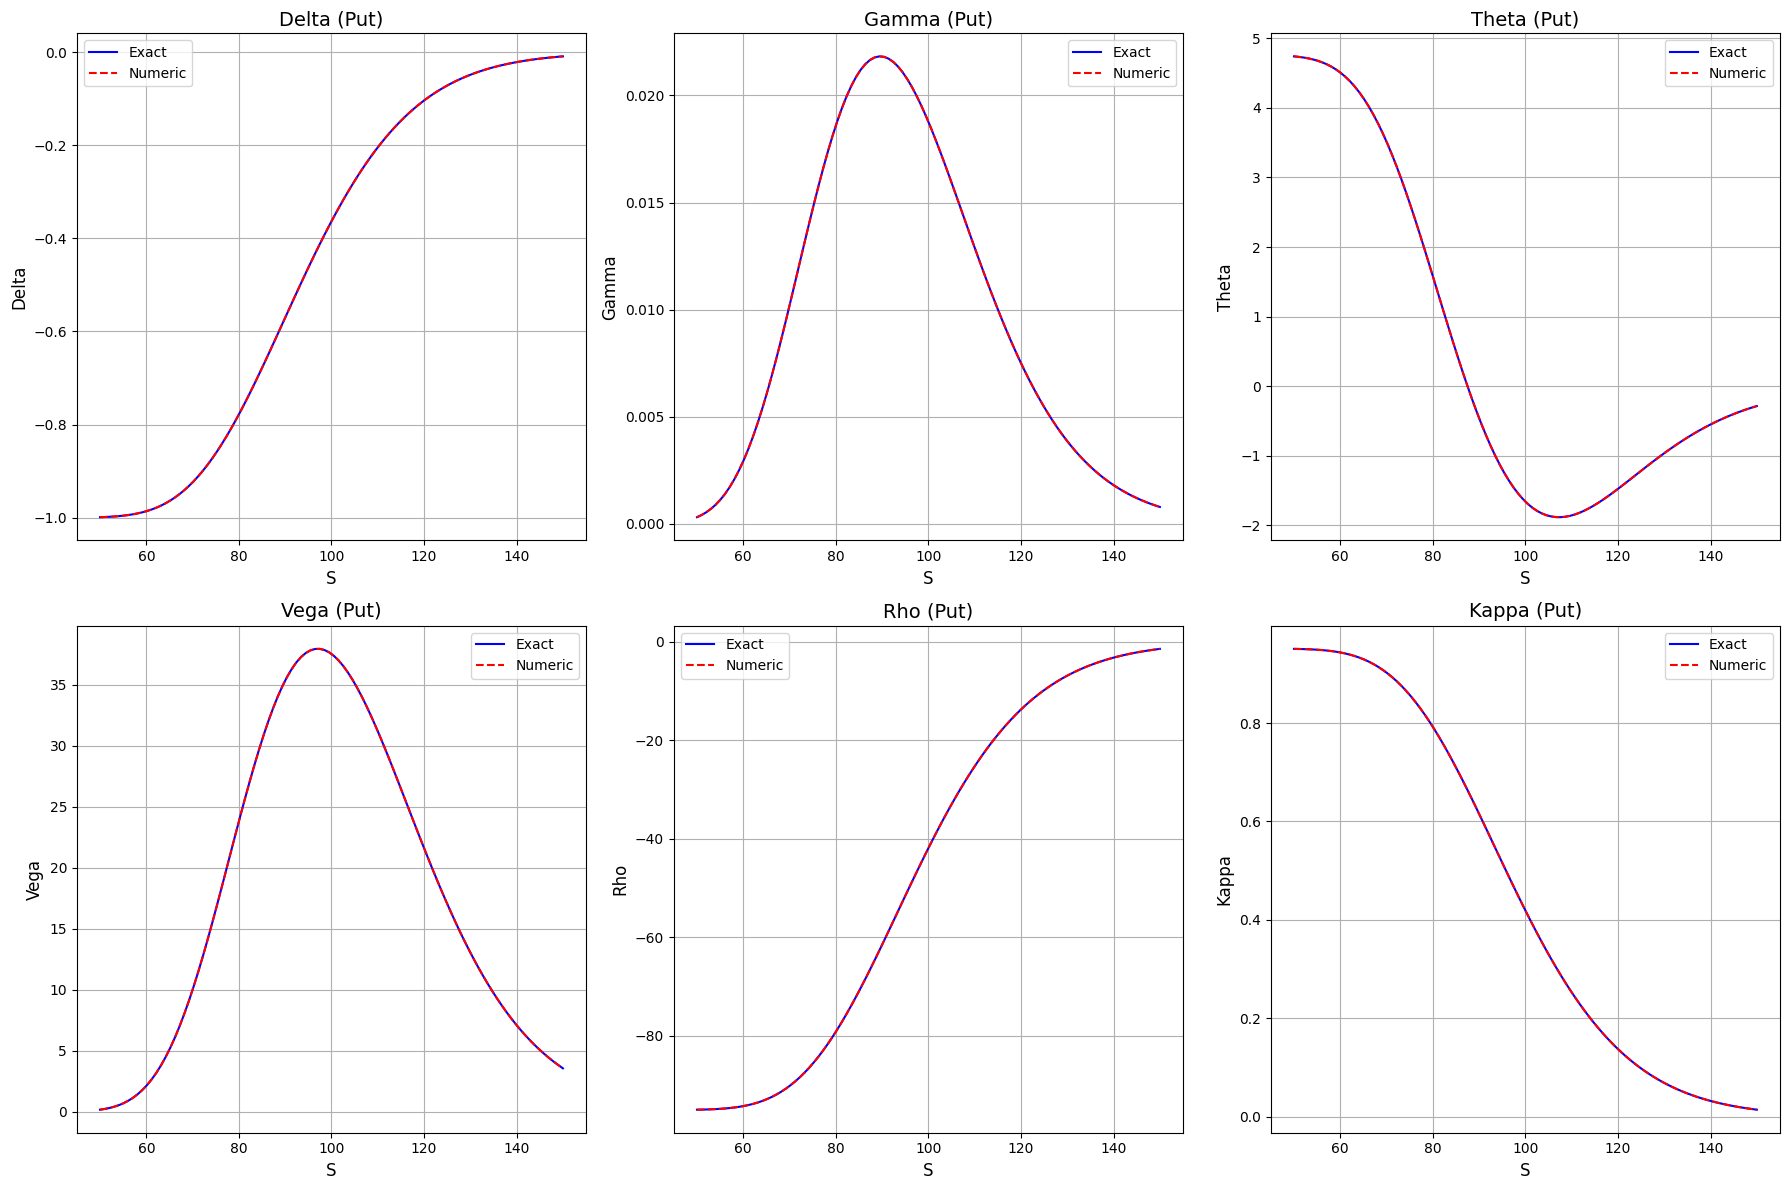

In [146]:

def option_price(S, K, r, T, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


def numerical_delta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            option_price(S - h, K, r, T, sigma, option_type)) / (2 * h)

def numerical_gamma(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S + h, K, r, T, sigma, option_type) - 
            2 * option_price(S, K, r, T, sigma, option_type) + 
            option_price(S - h, K, r, T, sigma, option_type)) / (h ** 2)

def numerical_vega(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T, sigma + h, option_type) - 
            option_price(S, K, r, T, sigma - h, option_type)) / (2 * h)

def numerical_theta(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r, T - h, sigma, option_type) - 
            option_price(S, K, r, T + h, sigma, option_type)) / (2 * h)

def numerical_rho(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K, r + h, T, sigma, option_type) - 
            option_price(S, K, r - h, T, sigma, option_type)) / (2 * h)

def numerical_kappa(S, K, r, T, sigma, option_type, h=0.001):
    return (option_price(S, K + h, r, T, sigma, option_type) - 
            option_price(S, K - h, r, T, sigma, option_type)) / (2 * h)


def plot_greeks(S_range, K, r, T, sigma, option_type):
    S_values = np.linspace(*S_range, 100)
    greeks = {
        'Delta': lambda S: numerical_delta(S, K, r, T, sigma, option_type),
        'Gamma': lambda S: numerical_gamma(S, K, r, T, sigma, option_type),
        'Theta': lambda S: numerical_theta(S, K, r, T, sigma, option_type),
        'Vega': lambda S: numerical_vega(S, K, r, T, sigma, option_type),
        'Rho': lambda S: numerical_rho(S, K, r, T, sigma, option_type),
        'Kappa': lambda S: numerical_kappa(S, K, r, T, sigma, option_type),
    }
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    for ax, (name, func) in zip(axs.flat, greeks.items()):
        exact_values = [func(S) for S in S_values]
        numerical_values = [func(S) for S in S_values]
        ax.plot(S_values, exact_values, label='Exact', color='blue')
        ax.plot(S_values, numerical_values, '--', label='Numeric', color='red')
        ax.set_title(f"{name} ({option_type.capitalize()})", fontsize=14)
        ax.set_xlabel("S", fontsize=12)
        ax.set_ylabel(name, fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)
    plt.tight_layout()
    plt.show()


plot_greeks((50, 150), 100, 0.05, 1, 0.2, 'call')
plot_greeks((50, 150), 100, 0.05, 1, 0.2, 'put')

Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

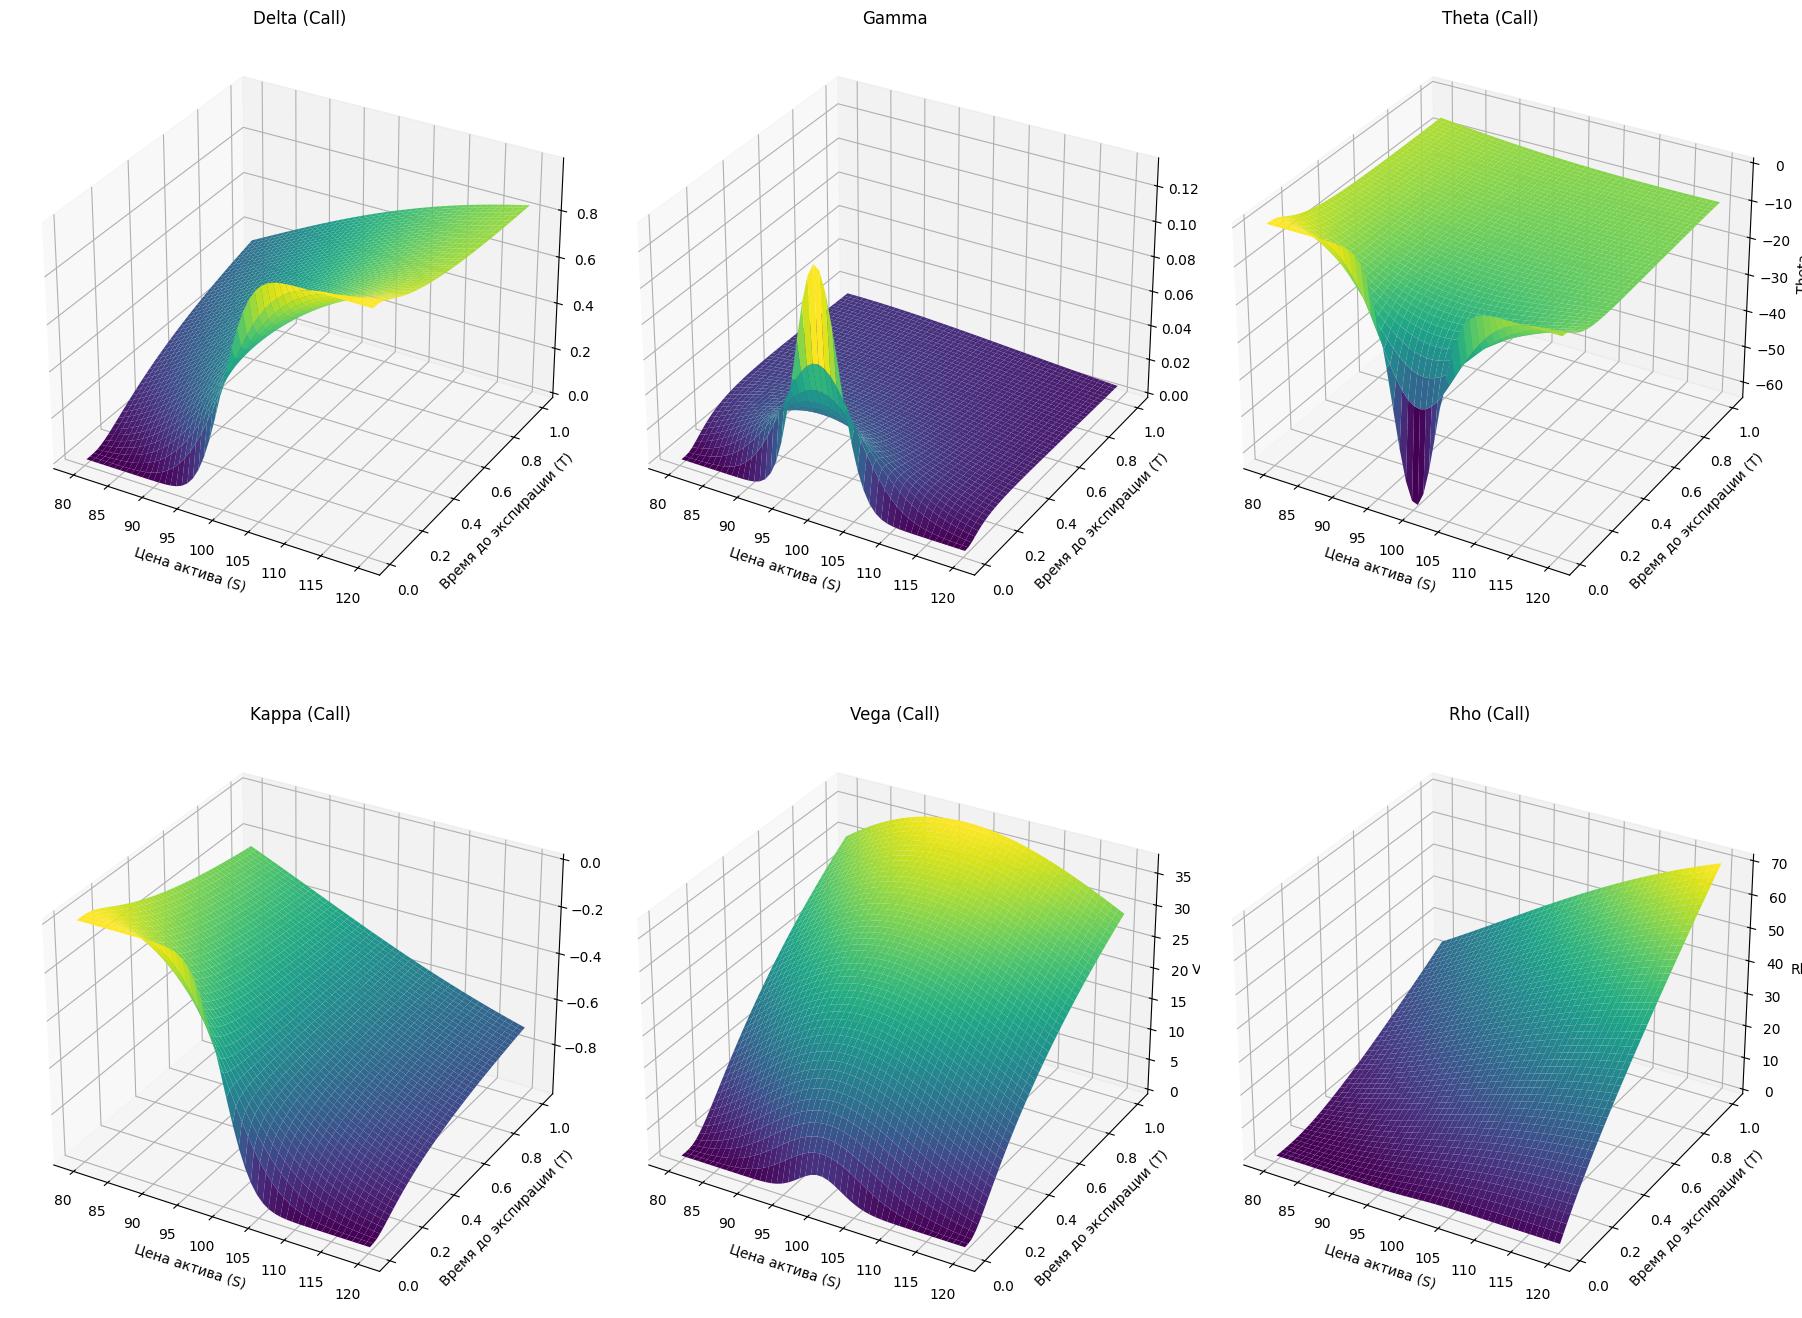

In [152]:
# Диапазон параметров
S_range = np.linspace(80, 120, 50)  # Цена актива
T_range = np.linspace(0.01, 1, 50)  # Время до экспирации (от 1 дня до 1 года)
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Параметры опциона
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t


Delta_call = delta(S_grid, K, r, T_grid, sigma, "call")
Gamma = gamma(S_grid, K, r, T_grid, sigma)
Theta_call = theta(S_grid, K, r, T_grid, sigma, "call")
Kappa_call = kappa(S_grid, K, r, T_grid, sigma, "call")
Vega = vega(S_grid, K, r, T_grid, sigma)
Rho = rho(S_grid, K, r, T_grid, sigma, "call")

# Построение 3D-графиков
fig = plt.figure(figsize=(18, 15))

# Delta
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(S_grid, T_grid, Delta_call, cmap='viridis')
ax1.set_title("Delta (Call)")
ax1.set_xlabel("Цена актива (S)")
ax1.set_ylabel("Время до экспирации (T)")
ax1.set_zlabel("Delta")

# Gamma
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(S_grid, T_grid, Gamma, cmap='viridis')
ax2.set_title("Gamma")
ax2.set_xlabel("Цена актива (S)")
ax2.set_ylabel("Время до экспирации (T)")
ax2.set_zlabel("Gamma")

# Theta
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(S_grid, T_grid, Theta_call, cmap='viridis')
ax3.set_title("Theta (Call)")
ax3.set_xlabel("Цена актива (S)")
ax3.set_ylabel("Время до экспирации (T)")
ax3.set_zlabel("Theta")

# Kappa
ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(S_grid, T_grid, Kappa_call, cmap='viridis')
ax4.set_title("Kappa (Call)")
ax4.set_xlabel("Цена актива (S)")
ax4.set_ylabel("Время до экспирации (T)")
ax4.set_zlabel("Kappa")

# Vega
ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(S_grid, T_grid, Vega, cmap='viridis')
ax5.set_title("Vega (Call)")
ax5.set_xlabel("Цена актива (S)")
ax5.set_ylabel("Время до экспирации (T)")
ax5.set_zlabel("Vega")

# Rho
ax6 = fig.add_subplot(236, projection='3d')
ax6.plot_surface(S_grid, T_grid, Rho, cmap='viridis')
ax6.set_title("Rho (Call)")
ax6.set_xlabel("Цена актива (S)")
ax6.set_ylabel("Время до экспирации (T)")
ax6.set_zlabel("Rho")

plt.tight_layout()
plt.show()

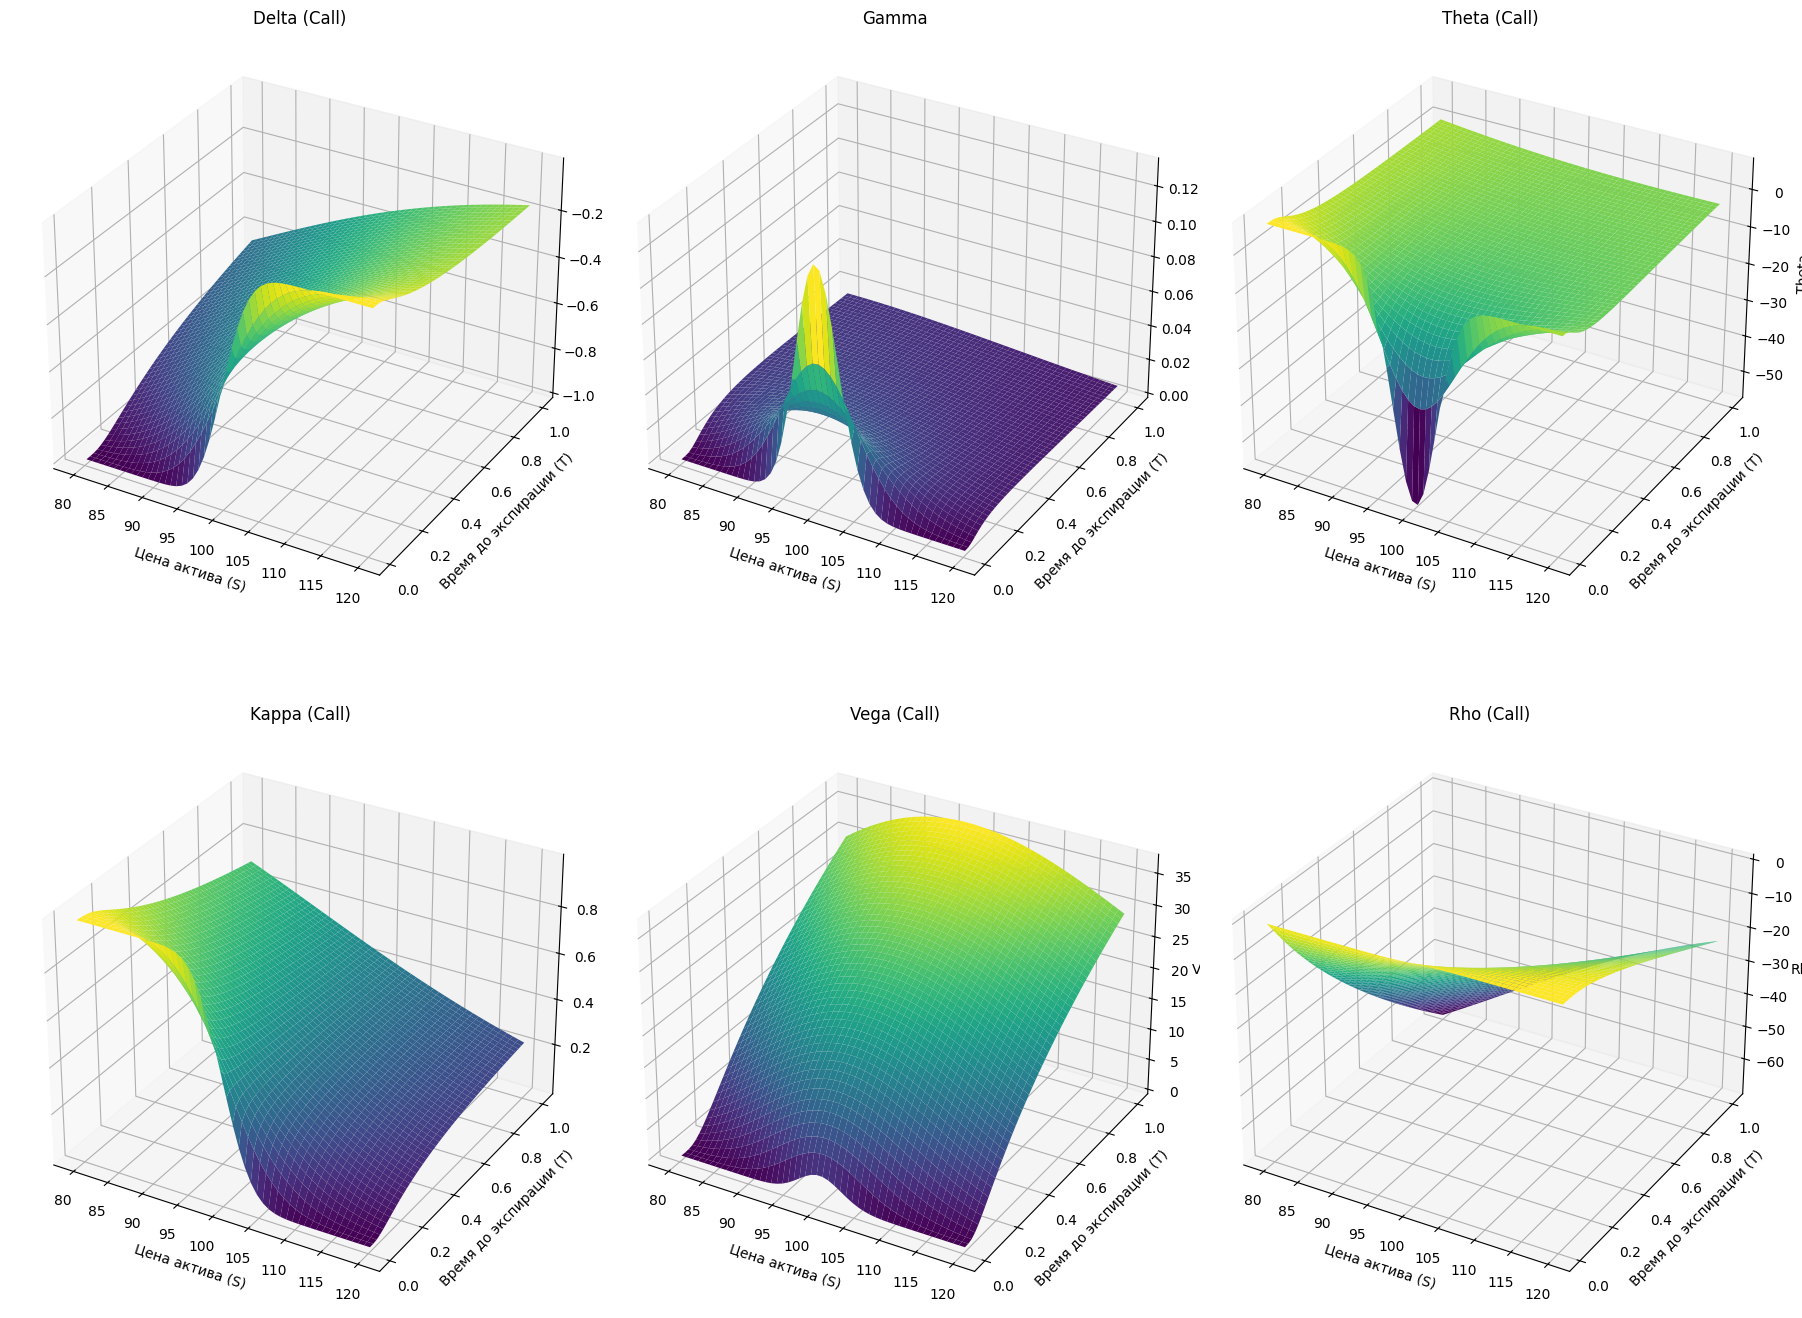

In [153]:
# Диапазон параметров
S_range = np.linspace(80, 120, 50)  # Цена актива
T_range = np.linspace(0.01, 1, 50)  # Время до экспирации (от 1 дня до 1 года)
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Параметры опциона
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t


Delta_call = delta(S_grid, K, r, T_grid, sigma, "put")
Gamma = gamma(S_grid, K, r, T_grid, sigma)
Theta_call = theta(S_grid, K, r, T_grid, sigma, "put")
Kappa_call = kappa(S_grid, K, r, T_grid, sigma, "put")
Vega = vega(S_grid, K, r, T_grid, sigma)
Rho = rho(S_grid, K, r, T_grid, sigma, "put")

# Построение 3D-графиков
fig = plt.figure(figsize=(18, 15))

# Delta
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(S_grid, T_grid, Delta_call, cmap='viridis')
ax1.set_title("Delta (Call)")
ax1.set_xlabel("Цена актива (S)")
ax1.set_ylabel("Время до экспирации (T)")
ax1.set_zlabel("Delta")

# Gamma
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(S_grid, T_grid, Gamma, cmap='viridis')
ax2.set_title("Gamma")
ax2.set_xlabel("Цена актива (S)")
ax2.set_ylabel("Время до экспирации (T)")
ax2.set_zlabel("Gamma")

# Theta
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(S_grid, T_grid, Theta_call, cmap='viridis')
ax3.set_title("Theta (Call)")
ax3.set_xlabel("Цена актива (S)")
ax3.set_ylabel("Время до экспирации (T)")
ax3.set_zlabel("Theta")

# Kappa
ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(S_grid, T_grid, Kappa_call, cmap='viridis')
ax4.set_title("Kappa (Call)")
ax4.set_xlabel("Цена актива (S)")
ax4.set_ylabel("Время до экспирации (T)")
ax4.set_zlabel("Kappa")

# Vega
ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(S_grid, T_grid, Vega, cmap='viridis')
ax5.set_title("Vega (Call)")
ax5.set_xlabel("Цена актива (S)")
ax5.set_ylabel("Время до экспирации (T)")
ax5.set_zlabel("Vega")

# Rho
ax6 = fig.add_subplot(236, projection='3d')
ax6.plot_surface(S_grid, T_grid, Rho, cmap='viridis')
ax6.set_title("Rho (Call)")
ax6.set_xlabel("Цена актива (S)")
ax6.set_ylabel("Время до экспирации (T)")
ax6.set_zlabel("Rho")

plt.tight_layout()
plt.show()

# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

[*********************100%%**********************]  1 of 1 completed


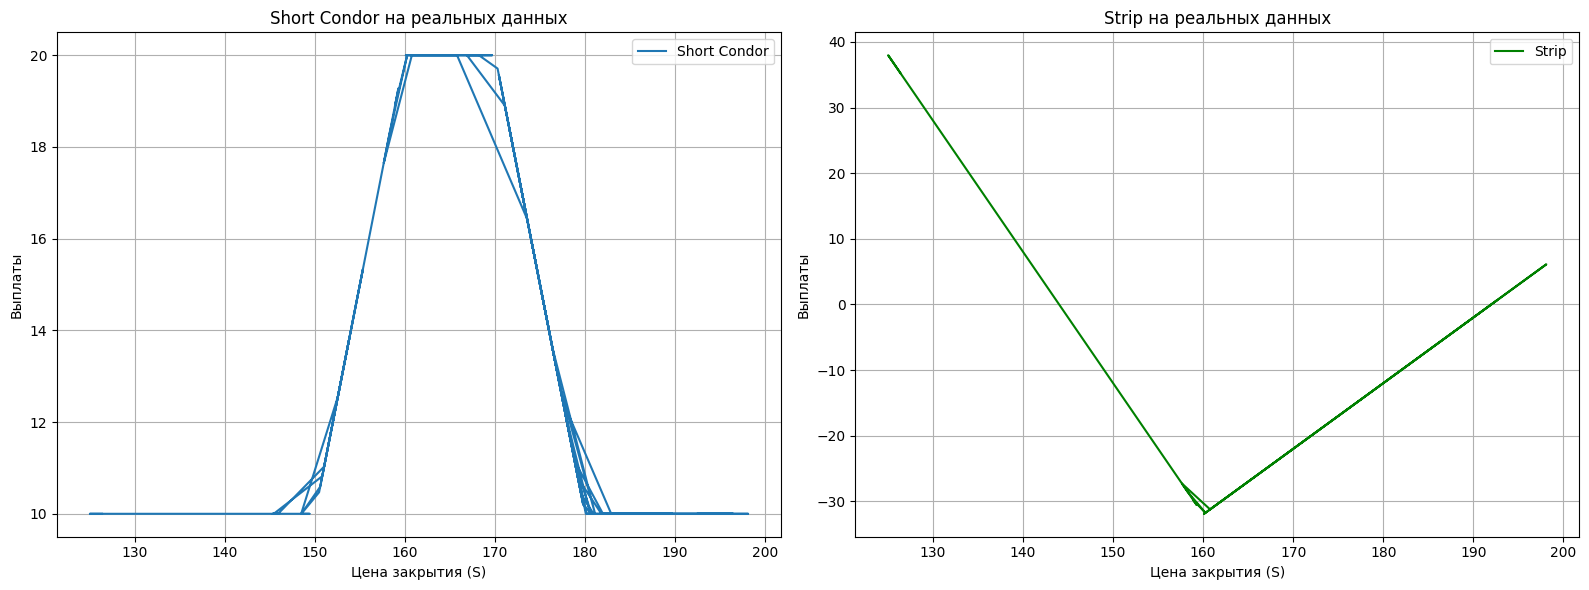

Short Condor (на реальных данных):
Максимальная прибыль: 20.0
Максимальный убыток: 10.0

Strip (на реальных данных):
Максимальная прибыль: 37.96000671386719
Максимальный убыток: -31.899993896484375


In [157]:
# Функции выплат
def payoff_long_call(S, K, premium):
    return np.maximum(S - K, 0) - premium

def payoff_short_call(S, K, premium):
    return -payoff_long_call(S, K, premium)

def payoff_long_put(S, K, premium):
    return np.maximum(K - S, 0) - premium

def payoff_short_put(S, K, premium):
    return -payoff_long_put(S, K, premium)

# Short Condor Strategy
def short_condor(S, K1, K2, K3, K4, P1, P2, P3, P4):
    """
    K1 < K2 < K3 < K4
    P1, P4: premiums for long call options
    P2, P3: premiums for short call options
    """
    return (
        payoff_long_call(S, K1, P1) +
        payoff_short_call(S, K2, P2) +
        payoff_short_call(S, K3, P3) +
        payoff_long_call(S, K4, P4)
    )

# Strip Strategy
def strip(S, K, P_call, P_put):
    """
    Strip strategy: Buy 1 call and 2 puts with the same strike
    """
    return payoff_long_call(S, K, P_call) + 2 * payoff_long_put(S, K, P_put)

# Шаг 1: Скачивание данных базового актива
ticker = "AAPL"  # Замените на тикер вашего интереса
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")  # Загрузка данных
data["Returns"] = data["Close"].pct_change()  # Ежедневная доходность
data = data.dropna()  # Удаление пропусков


# Шаг 2: Построение стратегий на реальных данных
S_real = data["Close"].values  # Используем реальные цены закрытия

# Параметры стратегий
K1, K2, K3, K4 = 150, 160, 170, 180  # Страйки для Short Condor
P1, P2, P3, P4 = 5, 10, 10, 5  # Примерные премии для Short Condor

K_strip = 160  # Страйк для Strip
P_call_strip, P_put_strip = 8, 12  # Примерные премии для Strip

# Расчёт выплат на основе реальных данных
payoff_condor_real = short_condor(S_real, K1, K2, K3, K4, P1, P2, P3, P4)
payoff_strip_real = strip(S_real, K_strip, P_call_strip, P_put_strip)

# Шаг 3: Визуализация результатов
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Short Condor
ax[0].plot(S_real, payoff_condor_real, label="Short Condor")
ax[0].set_title("Short Condor на реальных данных")
ax[0].set_xlabel("Цена закрытия (S)")
ax[0].set_ylabel("Выплаты")
ax[0].legend()
ax[0].grid()

# Strip
ax[1].plot(S_real, payoff_strip_real, label="Strip", color="green")
ax[1].set_title("Strip на реальных данных")
ax[1].set_xlabel("Цена закрытия (S)")
ax[1].set_ylabel("Выплаты")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

# Шаг 4: Анализ выплат
print("Short Condor (на реальных данных):")
print("Максимальная прибыль:", np.max(payoff_condor_real))
print("Максимальный убыток:", np.min(payoff_condor_real))

print("\nStrip (на реальных данных):")
print("Максимальная прибыль:", np.max(payoff_strip_real))
print("Максимальный убыток:", np.min(payoff_strip_real))

## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов 
$$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

[*********************100%%**********************]  1 of 1 completed

Текущая цена базового актива: 192.52999877929688
Оптимальное количество контрактов:
Call опционы: [ 10.  10. -10. -10. -10.]
Put опционы: [-10.         -10.         -10.         -10.          -3.33333333]
Минимальная стоимость стратегии: -683.3333333333334


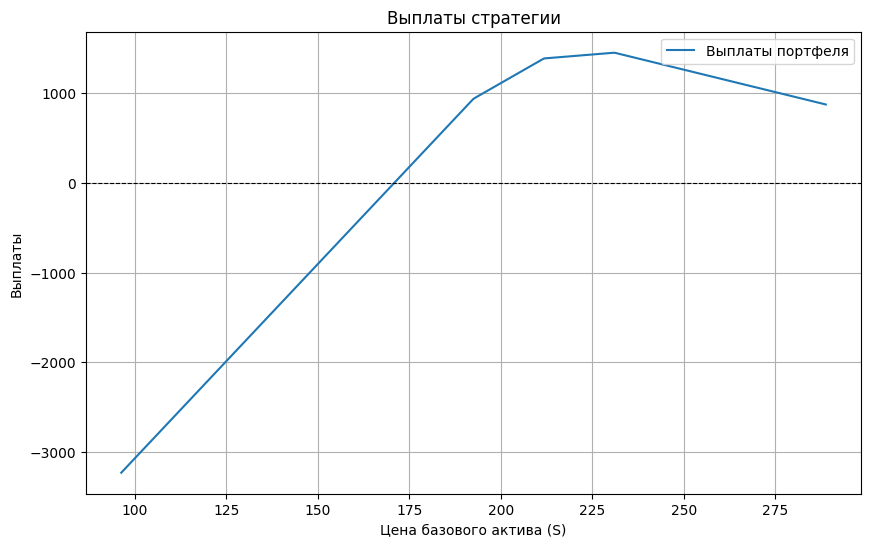

In [159]:
from scipy.optimize import linprog

# Шаг 1: Скачивание данных базового актива
ticker = "AAPL"  # Замените на тикер вашего интереса
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
data["Returns"] = data["Close"].pct_change()  # Ежедневная доходность
data = data.dropna()

# Определяем текущую цену
S0 = data["Close"].iloc[-1]  # Последняя цена закрытия
print(f"Текущая цена базового актива: {S0}")

# Шаг 2: Симуляция данных по опционам (пример)
# Здесь можно скачать реальные данные с доски опционов Nasdaq, но пока используем синтетические данные
strikes = np.linspace(S0 * 0.8, S0 * 1.2, 5)  # Страйки ±20% от текущей цены
ask_call = [5, 7, 10, 12, 15]  # Ask цены для Call опционов
ask_put = [6, 8, 11, 13, 16]   # Ask цены для Put опционов

# Шаг 3: Определение параметров задачи
x = 0.1  # Защита от изменения цены (10%)
y = 0.2  # Максимальный убыток (20%)
L, U = -10, 10  # Лимиты на количество контрактов
w = 1000  # Максимальная стоимость стратегии
S_up = S0 * (1 + x)  # Цена при росте на x%
S_down = S0 * (1 - x)  # Цена при падении на x%

# Целевая функция (стоимость стратегии)
c = np.array(ask_call + ask_put)

# Ограничения
n = len(strikes)
A_eq = np.zeros((1, 2 * n))  # Для хеджирования
b_eq = [0]

# Хеджирование
for i, K in enumerate(strikes):
    A_eq[0, i] = max(S_up - K, 0)  # Call
    A_eq[0, i + n] = max(K - S_down, 0)  # Put

# Ограничение на убыток
A_ub = np.zeros((1, 2 * n))
b_ub = [S0 * y]

# Границы переменных
bounds = [(L, U)] * (2 * n)

# Шаг 4: Оптимизация
res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Шаг 5: Результаты
if res.success:
    print("Оптимальное количество контрактов:")
    print("Call опционы:", res.x[:n])
    print("Put опционы:", res.x[n:])
    print("Минимальная стоимость стратегии:", res.fun)
else:
    print("Оптимизация не удалась.")

# Шаг 6: График выплат стратегии
S_range = np.linspace(S0 * 0.5, S0 * 1.5, 500)  # Диапазон цен базового актива

def portfolio_payoff(S, strikes, quantities_call, quantities_put, ask_call, ask_put):
    payoff = np.zeros_like(S)
    for i, K in enumerate(strikes):
        payoff += quantities_call[i] * (np.maximum(S - K, 0) - ask_call[i])
        payoff += quantities_put[i] * (np.maximum(K - S, 0) - ask_put[i])
    return payoff

# Рассчитываем выплаты
payoff = portfolio_payoff(S_range, strikes, res.x[:n], res.x[n:], ask_call, ask_put)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(S_range, payoff, label="Выплаты портфеля")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Цена базового актива (S)")
plt.ylabel("Выплаты")
plt.title("Выплаты стратегии")
plt.grid()
plt.legend()
plt.show()